# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2025-03-02 15:58:09.258786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-02 15:58:09.271511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-02 15:58:09.275772: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 15:58:09.301570: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


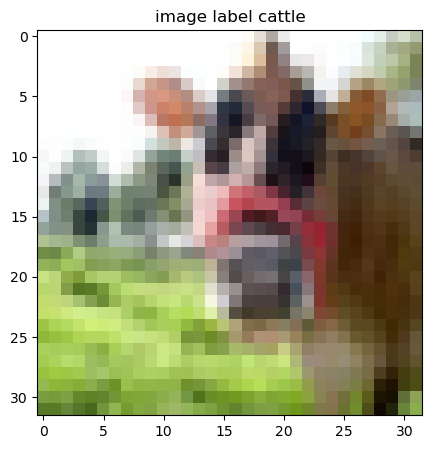

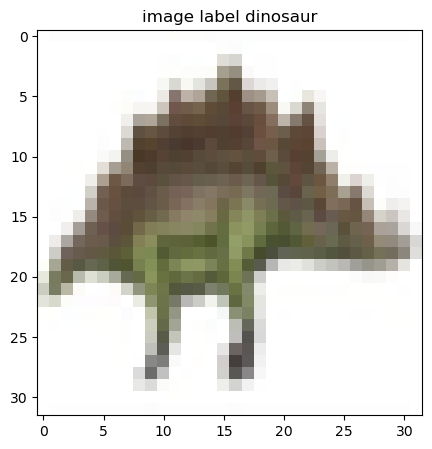

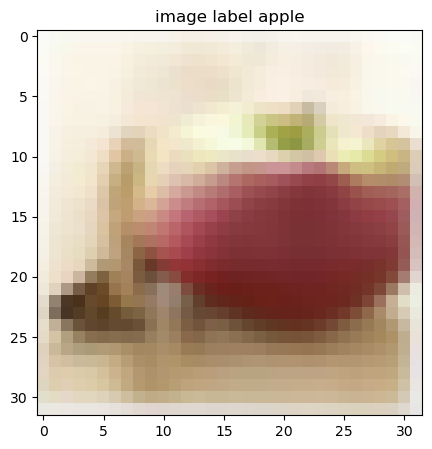

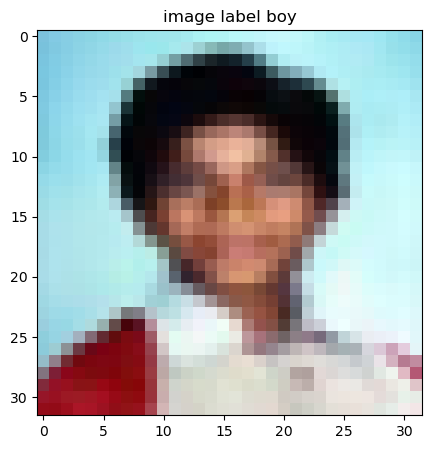

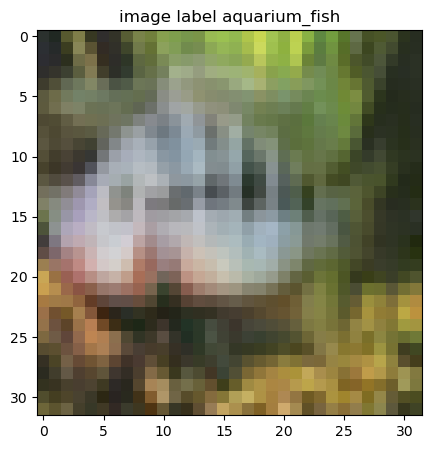

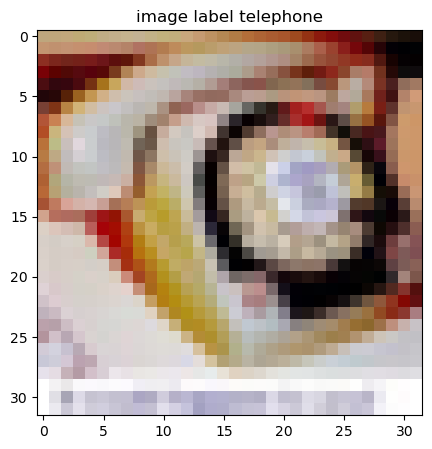

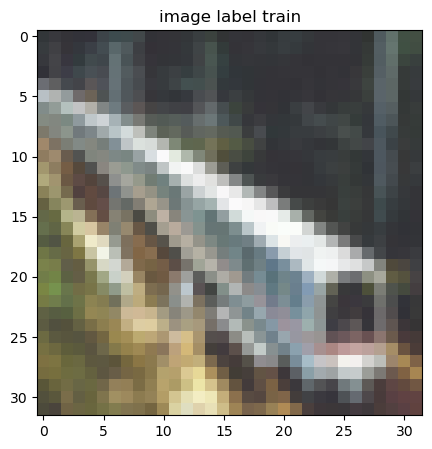

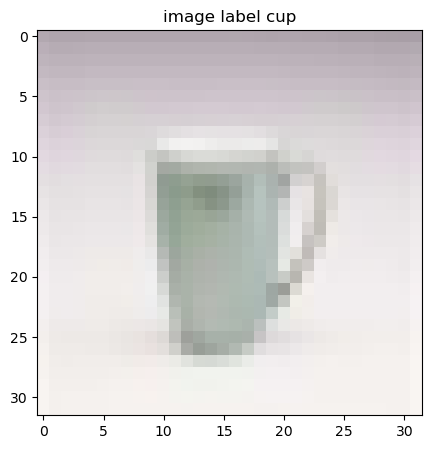

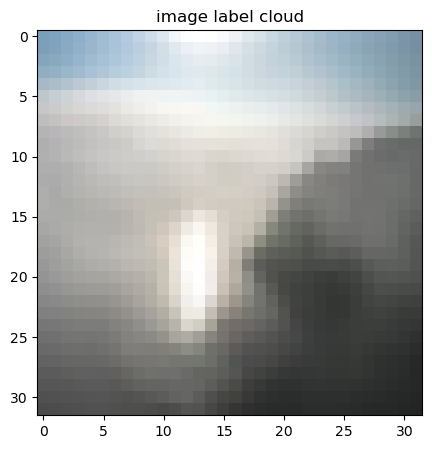

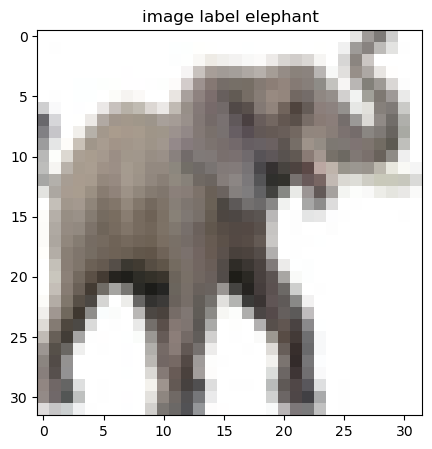

In [3]:
# Your Code Here
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

print("Image dimensions:", x_train[0].shape)
print("Number of classes:", len(class_names))

# Plot images
import matplotlib.pyplot as plt

def show_image(index, features=x_train, labels=lambda x: class_names[y_train[x][0]]):
    plt.figure(figsize=(5, 5))
    plt.imshow(features[index])
    plt.title("image label %s" % labels(index))

for i in range(10):
    show_image(i)

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your Code Here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

scaler = MinMaxScaler()
def preprocess_data(features):
    flattened = features.reshape(-1, 1)
    preprocessed = scaler.fit_transform(flattened)
    return preprocessed.reshape(features.shape)

def preprocess_labels(labels):
    return to_categorical(labels, num_classes=len(class_names))

x_train_preprocessed = preprocess_data(x_train)
y_train_preprocessed = preprocess_labels(y_train)

preprocessed_train_x, preprocessed_validation_x, preprocessed_train_y, preprocessed_validation_y = train_test_split(
    x_train_preprocessed, y_train_preprocessed, train_size=0.8, random_state=42, stratify=y_train_preprocessed)

x_test_preprocessed = preprocess_data(x_test)
y_test_preprocessed = preprocess_labels(y_test)

print("Training data preprocessed")
print(x_train_preprocessed.shape)
print(y_train_preprocessed.shape)

print("Training data after split")
print("  Training:")
print(preprocessed_train_x.shape)
print(preprocessed_train_y.shape)
print("  Validation")
print(preprocessed_validation_x.shape)
print(preprocessed_validation_y.shape)

print("Test data preprocessed")
print(x_test_preprocessed.shape)
print(y_test_preprocessed.shape)

Training data preprocessed
(50000, 32, 32, 3)
(50000, 100)
Training data after split
  Training:
(40000, 32, 32, 3)
(40000, 100)
  Validation
(10000, 32, 32, 3)
(10000, 100)
Test data preprocessed
(10000, 32, 32, 3)
(10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
# Your Code Here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

baseline_model = Sequential()
baseline_model.add(Conv2D(filters=32, kernel_size=4, input_shape=(32, 32, 3)))
baseline_model.add(MaxPool2D())
baseline_model.add(Conv2D(filters=128, kernel_size=2))
baseline_model.add(MaxPool2D())
baseline_model.add(Dropout(0.3))
baseline_model.add(Flatten())
baseline_model.add(Dense(128, activation='relu'))
baseline_model.add(Dropout(0.2))
baseline_model.add(Dense(1024, activation='sigmoid'))
baseline_model.add(Dropout(0.3))
baseline_model.add(Dense(256, activation='relu'))
baseline_model.add(Dropout(0.2))
baseline_model.add(Dense(100, activation='softmax'))
baseline_model.summary()


/home/pbaisla/.conda/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1740949096.013644  860550 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740949096.217767  860550 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740949096.22

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028,228 (3.92 MB)

 Trainable params: 1,028,228 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy - We have 100 class labels which have been one hot encoded. 
- <b>Optimizer:</b> adam - Adam usually works well without much tuning.

In [6]:
# Your Code Here

from keras.optimizers import Adam

baseline_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=3e-4),
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your Code Here
history = baseline_model.fit(
    preprocessed_train_x,
    preprocessed_train_y,
    epochs=30, # The model begins to overfit after 30 epochs
    batch_size=32,
    validation_data=(preprocessed_validation_x, preprocessed_validation_y)
)

Epoch 1/30


I0000 00:00:1740949098.330795  860724 service.cc:146] XLA service 0x7dd4b000dd10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740949098.330816  860724 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2025-03-02 15:58:18.354983: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-02 15:58:18.561802: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90300


 128/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0086 - loss: 4.7074

I0000 00:00:1740949101.624399  860724 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1215/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0165 - loss: 4.5576

2025-03-02 15:58:25.091246: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_83', 200 bytes spill stores, 200 bytes spill loads



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0168 - loss: 4.5535 - val_accuracy: 0.0733 - val_loss: 4.0506
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0714 - loss: 4.0349 - val_accuracy: 0.1334 - val_loss: 3.6835
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1227 - loss: 3.7227 - val_accuracy: 0.1730 - val_loss: 3.4603
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1535 - loss: 3.5405 - val_accuracy: 0.1978 - val_loss: 3.3037
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1755 - loss: 3.4109 - val_accuracy: 0.2176 - val_loss: 3.2023
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1970 - loss: 3.3000 - val_accuracy: 0.2376 - val_loss: 3.1090
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2128 - loss: 3.2033 - val_accuracy: 0.2522 - val_loss: 3.0328
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2313 - loss: 3.1090 - val_accura

Text(0.5, 1.0, 'Loss')

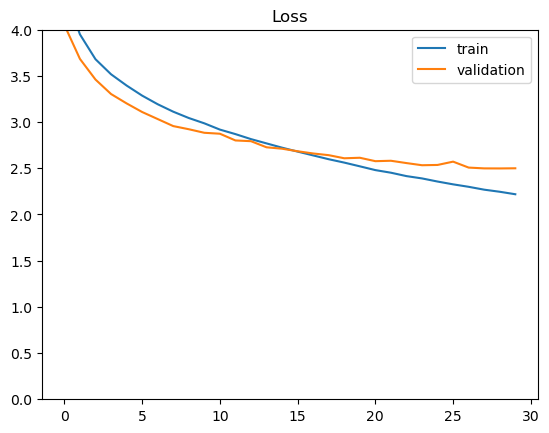

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 4)
plt.legend(loc='best')
plt.title('Loss')

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 36.62%
- <b>Other metric:</b> F1 score
- <b>Reason for selection:</b> F1 score is a combination for the precision and recall, both of which are important metrics for classification themselves.
- <b>Value of metric:</b> 0.35
- <b>Interpretation of metric value:</b> The F1 score is quite low indication poor model performance

In [9]:
# Your Code Here
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def compute_metrics(model):
    y_test_predictions = model.predict(x_test_preprocessed)
    y_test_class_indices = np.argmax(y_test_predictions, axis=1)
    accuracy = accuracy_score(y_test, y_test_class_indices)
    precision = precision_score(y_test, y_test_class_indices, average='macro')
    recall = recall_score(y_test, y_test_class_indices, average='macro')
    f1_score_value = f1_score(y_test, y_test_class_indices, average='macro')
    print("Accuracy:", accuracy)
    print("Precsion:", precision)
    print("Recall:", recall)
    print("F1 score:", f1_score_value)

compute_metrics(baseline_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.3662
Precsion: 0.3646071440720351
Recall: 0.3662
F1 score: 0.3568822023264941


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

Text(0.5, 1.0, 'Accuracy')

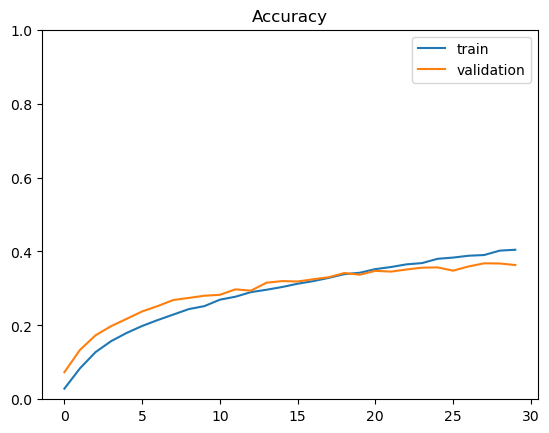

In [10]:
# Plot the training accuracy and validation accuracy with respect to epochs.
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.title('Accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
Predicted: rocket
Probablilities:
rocket: 0.971
sea: 0.008
cloud: 0.007
plain: 0.004
skyscraper: 0.003
ray: 0.002
mountain: 0.001
palm_tree: 0.001
shark: 0.001
lamp: 0.000
road: 0.000
bottle: 0.000
whale: 0.000
bear: 0.000
spider: 0.000
worm: 0.000
lobster: 0.000
cup: 0.000
pine_tree: 0.000
bridge: 0.000
lawn_mower: 0.000
seal: 0.000
willow_tree: 0.000
television: 0.000
forest: 0.000
bowl: 0.000
dinosaur: 0.000
mouse: 0.000
otter: 0.000
flatfish: 0.000
lizard: 0.000
cattle: 0.000
camel: 0.000
keyboard: 0.000
chair: 0.000
rabbit: 0.000
aquarium_fish: 0.000
dolphin: 0.000
cockroach: 0.000
telephone: 0.000
clock: 0.000
turtle: 0.000
trout: 0.000
table: 0.000
baby: 0.000
elephant: 0.000
train: 0.000
couch: 0.000
kangaroo: 0.000
bed: 0.000
can: 0.000
orchid: 0.000
castle: 0.000
tank: 0.000
squirrel: 0.000
man: 0.000
plate: 0.000
crocodile: 0.000
sunflower: 0.000
bicycle: 0.000
oak_tree: 0.000
bus: 0.000
fox: 0.000
caterpillar: 0.000
shrew: 0.000
sw

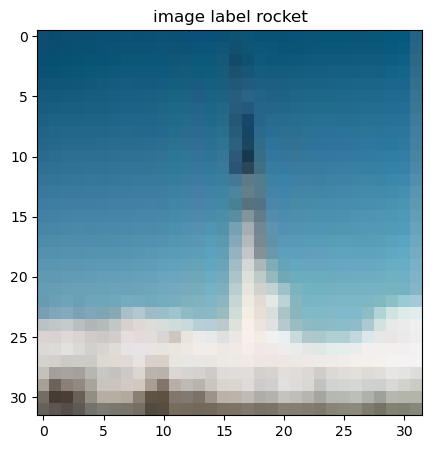

In [11]:
# Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
y_test_predictions = baseline_model.predict(x_test_preprocessed)
y_test_class_indices = np.argmax(y_test_predictions, axis=1)
index = 13
print("Predicted:", class_names[y_test_class_indices[index]])
print("Probablilities:")
sorted_probabilities = sorted(list(zip(class_names, y_test_predictions[index])), key=lambda x: x[1], reverse=True)
for classname, probability in sorted_probabilities:
    print(f"{classname}: {probability:.3f}")
show_image(index, x_test, labels=lambda x: class_names[y_test[x][0]])

Predicted: bridge
Probablilities:
bridge: 0.204
whale: 0.137
rocket: 0.128
sea: 0.127
mountain: 0.086
road: 0.044
dolphin: 0.042
skyscraper: 0.040
lamp: 0.017
seal: 0.016
cloud: 0.015
otter: 0.014
shark: 0.011
pine_tree: 0.008
spider: 0.007
train: 0.007
plain: 0.007
castle: 0.006
couch: 0.005
tank: 0.005
palm_tree: 0.005
house: 0.005
dinosaur: 0.004
bottle: 0.004
crocodile: 0.003
bear: 0.003
keyboard: 0.003
ray: 0.003
streetcar: 0.002
lizard: 0.002
can: 0.002
cockroach: 0.002
television: 0.002
bed: 0.002
camel: 0.002
willow_tree: 0.001
bus: 0.001
elephant: 0.001
pickup_truck: 0.001
beaver: 0.001
caterpillar: 0.001
table: 0.001
cup: 0.001
chair: 0.001
man: 0.001
skunk: 0.001
bowl: 0.001
crab: 0.001
trout: 0.001
cattle: 0.001
lobster: 0.001
telephone: 0.001
snail: 0.001
sunflower: 0.001
turtle: 0.001
lawn_mower: 0.001
worm: 0.001
kangaroo: 0.001
flatfish: 0.001
forest: 0.000
baby: 0.000
maple_tree: 0.000
mouse: 0.000
shrew: 0.000
motorcycle: 0.000
bicycle: 0.000
squirrel: 0.000
beetle: 0

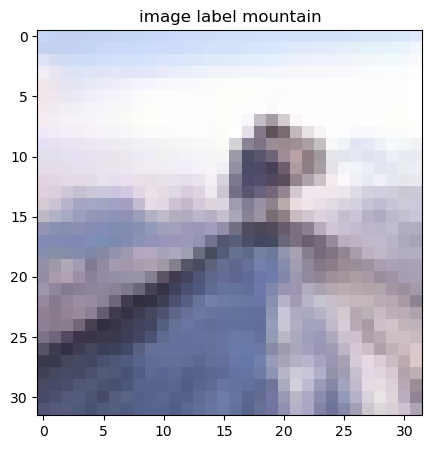

In [12]:
incorrect_index = 0
print("Predicted:", class_names[y_test_class_indices[incorrect_index]])
print("Probablilities:")
sorted_probabilities = sorted(list(zip(class_names, y_test_predictions[incorrect_index])), key=lambda x: x[1], reverse=True)
for classname, probability in sorted_probabilities:
    print(f"{classname}: {probability:.3f}")
show_image(incorrect_index, x_test, labels=lambda x: class_names[y_test[x][0]])

Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

> The plots show a poor model performance with an accuracy of less than 40%. This is expected as the model has not yet been optimized and different combinations of layers, depth/width haven't been tried out.

> The classification probablities indicate how likely the model thought an image to belong to a particular class.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

> The improved model uses several techniques to improve the performance:

> - Batch normalization for make the training faster and more stable

> - Dropout layers to prevent overfitting

> - Multiple convolution layers of different kernel sizes and number of filters to increase the learning capacity

> - Randomized image transformations to reduce overfitting

> Hyperparameter values were selected with trial and error 

In [13]:
# Your Code Here
from keras.layers import BatchNormalization

improved_model = Sequential()
improved_model.add(Conv2D(filters=32, kernel_size=2, activation='relu', input_shape=(32, 32, 3)))
improved_model.add(BatchNormalization())
improved_model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(MaxPool2D(pool_size=2))

improved_model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(Conv2D(filters=256, kernel_size=2, activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(MaxPool2D(pool_size=2))

improved_model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(Conv2D(filters=1024, kernel_size=3, activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(MaxPool2D(pool_size=2))
improved_model.add(Flatten())


improved_model.add(Dense(1024, activation='relu'))
improved_model.add(Dropout(0.5))


improved_model.add(Dense(256, activation='relu'))
improved_model.add(Dropout(0.4))

improved_model.add(Dense(100, activation='softmax'))
improved_model.summary()


/home/pbaisla/.conda/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 2, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,418,436 (28.30 MB)

 Trainable params: 7,414,404 (28.28 MB)

 Non-trainable params: 4,032 (15.75 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/100


/home/pbaisla/.conda/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0319 - loss: 4.6585

2025-03-02 16:01:09.500209: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_218', 132 bytes spill stores, 132 bytes spill loads



1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.0319 - loss: 4.6573 - val_accuracy: 0.0991 - val_loss: 3.9781
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0743 - loss: 4.1152 - val_accuracy: 0.1443 - val_loss: 3.6019
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1039 - loss: 3.8790 - val_accuracy: 0.1651 - val_loss: 3.4684
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1405 - loss: 3.6595 - val_accuracy: 0.2040 - val_loss: 3.2287
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1673 - loss: 3.4935 - val_accuracy: 0.2559 - val_loss: 2.9828
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1871 - loss: 3.3692 - val_accuracy: 0.2757 - val_loss: 2.9321
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2123 - loss: 3.2429 - val_accuracy: 0.3161 - val_loss: 2.6814
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2340 - loss: 3.1

Text(0.5, 1.0, 'Loss')

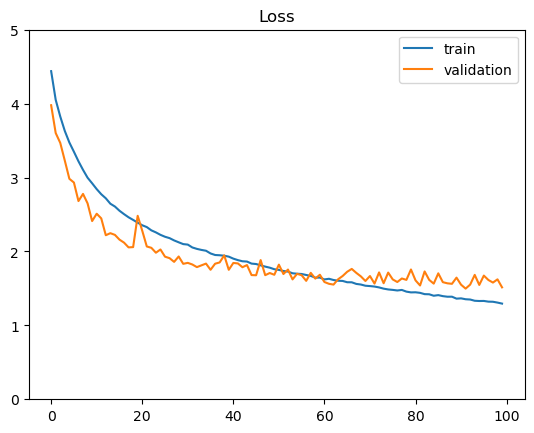

In [14]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        # rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


improved_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=3e-4),
    metrics=['accuracy']
)

history = improved_model.fit(
    datagen.flow(preprocessed_train_x, preprocessed_train_y, batch_size=32),
    epochs=100,
    validation_data=(preprocessed_validation_x, preprocessed_validation_y)
)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0, 5)
plt.legend(loc='best')
plt.title('Loss')

In [15]:
# Your Code Here
compute_metrics(improved_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.6186
Precsion: 0.6247743644424802
Recall: 0.6186
F1 score: 0.6147995736701777


Text(0.5, 1.0, 'Accuracy')

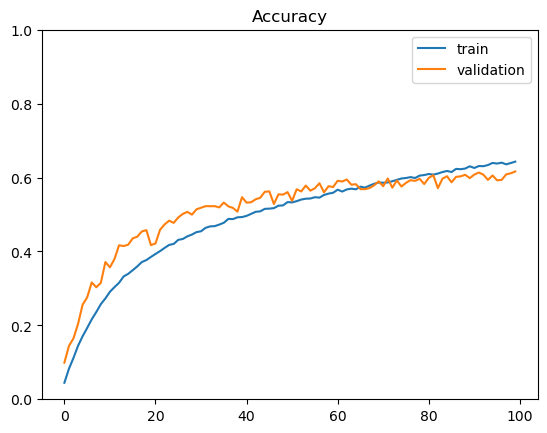

In [16]:
# Plot the training accuracy and validation accuracy with respect to epochs.
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.title('Accuracy')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted: streetcar
Probablilities:
streetcar: 0.982
train: 0.014
bus: 0.004
tractor: 0.000
house: 0.000
bridge: 0.000
pickup_truck: 0.000
can: 0.000
lawn_mower: 0.000
television: 0.000
tank: 0.000
bottle: 0.000
road: 0.000
caterpillar: 0.000
forest: 0.000
clock: 0.000
bowl: 0.000
castle: 0.000
bed: 0.000
skyscraper: 0.000
motorcycle: 0.000
lobster: 0.000
couch: 0.000
aquarium_fish: 0.000
flatfish: 0.000
table: 0.000
trout: 0.000
lamp: 0.000
keyboard: 0.000
turtle: 0.000
telephone: 0.000
bicycle: 0.000
beetle: 0.000
dinosaur: 0.000
snake: 0.000
mountain: 0.000
bee: 0.000
rocket: 0.000
butterfly: 0.000
palm_tree: 0.000
sea: 0.000
girl: 0.000
camel: 0.000
sunflower: 0.000
possum: 0.000
seal: 0.000
raccoon: 0.000
pine_tree: 0.000
shark: 0.000
sweet_pepper: 0.000
willow_tree: 0.000
plate: 0.000
wardrobe: 0.000
crab: 0.000
porcupine: 0.000
maple_tree: 0.000
man: 0.000
beaver: 0.000
chimpanzee: 0.000
pear: 0.000
boy: 0.000
baby: 0.000
worm: 0.000
liz

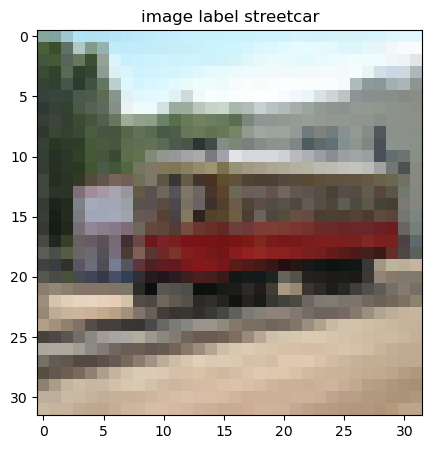

In [17]:

y_test_predictions = improved_model.predict(x_test_preprocessed)
y_test_class_indices = np.argmax(y_test_predictions, axis=1)
index = 12
print("Predicted:", class_names[y_test_class_indices[index]])
print("Probablilities:")
sorted_probabilities = sorted(list(zip(class_names, y_test_predictions[index])), key=lambda x: x[1], reverse=True)
for classname, probability in sorted_probabilities:
    print(f"{classname}: {probability:.3f}")
show_image(index, x_test, labels=lambda x: class_names[y_test[x][0]])

Predicted: spider
Probablilities:
spider: 0.467
beetle: 0.254
bee: 0.169
cockroach: 0.077
caterpillar: 0.023
lobster: 0.009
crab: 0.001
lizard: 0.001
butterfly: 0.000
dinosaur: 0.000
snail: 0.000
palm_tree: 0.000
orchid: 0.000
snake: 0.000
lawn_mower: 0.000
sweet_pepper: 0.000
tractor: 0.000
shrew: 0.000
crocodile: 0.000
turtle: 0.000
pear: 0.000
bottle: 0.000
rocket: 0.000
sunflower: 0.000
fox: 0.000
train: 0.000
bicycle: 0.000
table: 0.000
mouse: 0.000
trout: 0.000
otter: 0.000
motorcycle: 0.000
bridge: 0.000
cattle: 0.000
aquarium_fish: 0.000
squirrel: 0.000
willow_tree: 0.000
beaver: 0.000
tank: 0.000
worm: 0.000
kangaroo: 0.000
baby: 0.000
camel: 0.000
bear: 0.000
rose: 0.000
tulip: 0.000
boy: 0.000
elephant: 0.000
pine_tree: 0.000
girl: 0.000
leopard: 0.000
forest: 0.000
possum: 0.000
couch: 0.000
woman: 0.000
seal: 0.000
tiger: 0.000
skunk: 0.000
ray: 0.000
lamp: 0.000
maple_tree: 0.000
streetcar: 0.000
man: 0.000
flatfish: 0.000
house: 0.000
bed: 0.000
bus: 0.000
can: 0.000
bow

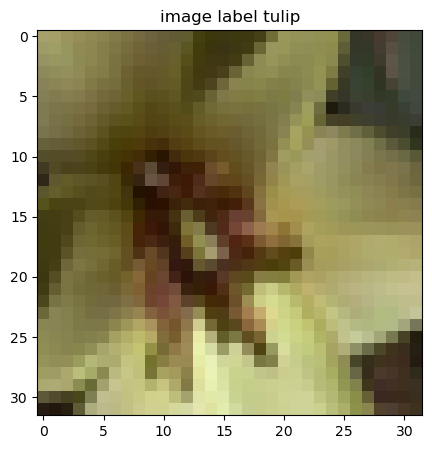

In [18]:
incorrect_index = 5
print("Predicted:", class_names[y_test_class_indices[incorrect_index]])
print("Probablilities:")
sorted_probabilities = sorted(list(zip(class_names, y_test_predictions[incorrect_index])), key=lambda x: x[1], reverse=True)
for classname, probability in sorted_probabilities:
    print(f"{classname}: {probability:.3f}")
show_image(incorrect_index, x_test, labels=lambda x: class_names[y_test[x][0]])

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The new model has a better accuracy of ~60%. The model's performance improved by using a better architecture and techniques such as batch normalization, dropout and multiple convolution layers. Apart from the model architecture, the model's performance saw significant improvement by using image manipulation techniques on the training data. The new model also improved with longer training time and was able to train for more epochs without overfitting. There could be room for more improvement. Apart from tuning different hyperparameters we can try to gather more training data to help the model learn better.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.